In [2]:
import pandas as pd

# Wczytywanie danych eCommerce
file_paths = [
    './data/cosmetics/2019-Oct.csv',
    './data/cosmetics/2019-Nov.csv',
    './data/cosmetics/2019-Dec.csv',
    './data/cosmetics/2020-Jan.csv',
    './data/cosmetics/2020-Feb.csv'
]

# Łączenie wielu plików w jeden DataFrame
dataframes = []
for path in file_paths:
    try:
        df = pd.read_csv(path)
        dataframes.append(df)
        print(f"{path} wczytano poprawnie, rozmiar: {len(df)} wierszy.")
    except Exception as e:
        print(f"Nie udało się wczytać {path}: {e}")

data = pd.concat(dataframes, ignore_index=True)
print(f"Łączny rozmiar danych: {len(data)} wierszy, {data.shape[1]} kolumn.")


./data/cosmetics/2019-Oct.csv wczytano poprawnie, rozmiar: 4102283 wierszy.
./data/cosmetics/2019-Nov.csv wczytano poprawnie, rozmiar: 4635837 wierszy.
./data/cosmetics/2019-Dec.csv wczytano poprawnie, rozmiar: 3533286 wierszy.
./data/cosmetics/2020-Jan.csv wczytano poprawnie, rozmiar: 4264752 wierszy.
./data/cosmetics/2020-Feb.csv wczytano poprawnie, rozmiar: 4156682 wierszy.
Łączny rozmiar danych: 20692840 wierszy, 9 kolumn.


In [3]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
20692835,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
20692836,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
20692837,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
20692838,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [4]:
data['event_type'].unique()

array(['cart', 'view', 'remove_from_cart', 'purchase'], dtype=object)

In [5]:
data.describe()

,product_id,category_id,price,user_id
count,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07
mean,5.484297e+06,1.554230e+18,8.534735e+00,5.215527e+08
std,1.305716e+06,1.691038e+17,1.938142e+01,8.744312e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.818306e+08
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531297e+08
75%,5.857864e+06,1.487580e+18,7.060000e+00,5.788573e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


! Wartość price ujemna. Będzie problem z logarytmami. Preprocessing do KMeans. Usunąć dane.

In [16]:
purchase_data = data[data['price'] > 0]
purchase_data.shape

(20588552, 9)

In [6]:
missing_values = data.isnull().sum()
print("Brakujące wartości w danych:")
print(missing_values)


Brakujące wartości w danych:
event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
dtype: int64


In [7]:
# Sprawdzenie unikalności kluczowych kolumn
print(f"Liczba unikalnych user_id: {data['user_id'].nunique()}")
print(f"Liczba unikalnych product_id: {data['product_id'].nunique()}")


Liczba unikalnych user_id: 1639358
Liczba unikalnych product_id: 54571


In [8]:
# Usuwanie braków danych
data_cleaned = data.dropna().copy()

# Poprawianie typów danych z użyciem .loc dla jasności
data_cleaned.loc[:, 'event_time'] = pd.to_datetime(data_cleaned['event_time'])
data_cleaned.loc[:, 'price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')

# Usuwanie ponownych braków danych po konwersji
data_cleaned = data_cleaned.dropna().copy()

# Usuwanie duplikatów
data_cleaned = data_cleaned.drop_duplicates().copy()

print(f"Dane po czyszczeniu: {data_cleaned.shape[0]} wierszy, {data_cleaned.shape[1]} kolumn.")

Dane po czyszczeniu: 258400 wierszy, 9 kolumn.


20692840 - liczba wierszy po wczytaniu

In [9]:
data_cleaned

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
21,2019-10-01 00:00:53+00:00,view,5856191,1487580006350586771,appliances.environment.vacuum,runail,24.44,507355498,944c7e9b-40bd-4112-a05b-81e73f37e0c0
264,2019-10-01 00:07:58+00:00,remove_from_cart,5767493,1487580013053083824,stationery.cartrige,italwax,2.14,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
269,2019-10-01 00:08:03+00:00,remove_from_cart,5759489,1487580013053083824,stationery.cartrige,italwax,2.14,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
276,2019-10-01 00:08:10+00:00,remove_from_cart,24336,1487580013053083824,stationery.cartrige,depilflax,3.02,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
278,2019-10-01 00:08:18+00:00,remove_from_cart,5775822,1487580013053083824,stationery.cartrige,italwax,2.14,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
...,...,...,...,...,...,...,...,...,...
20692521,2020-02-29 23:46:43+00:00,view,5929649,1487580006350586771,appliances.environment.vacuum,max,95.08,548866558,6792d8ce-18d5-4f42-8c67-dad27e4aa755
20692547,2020-02-29 23:47:54+00:00,view,5861766,1487580006350586771,appliances.environment.vacuum,emil,1.75,586536651,4873cf1c-2e85-4cf8-affa-0a2cdad2485a
20692710,2020-02-29 23:54:28+00:00,view,5856193,2193074740619379535,furniture.living_room.cabinet,runail,82.54,458687218,96138ac0-256d-4277-96a6-2a668b7b81d4
20692720,2020-02-29 23:54:43+00:00,view,5925386,2235524499216793855,appliances.personal.massager,gezatone,93.65,622090014,ae8169f7-a3b2-4de8-9e21-4a8fa82c1807


In [10]:
# Obliczenie daty analizy (np. ostatnia data w zbiorze danych)
analysis_date = data_cleaned['event_time'].max()

# Obliczanie metryk RFM
rfm = data_cleaned.groupby('user_id').agg({
    'event_time': lambda x: (analysis_date - x.max()).days,  # Recency
    'user_id': 'count',                                     # Frequency
    'price': 'sum'                                          # Monetary Value
}).rename(columns={'event_time': 'Recency', 'user_id': 'Frequency', 'price': 'MonetaryValue'})

print(rfm.head())


          Recency  Frequency  MonetaryValue
user_id                                    
15400971       78          3          28.56
20554973       84          6          11.28
23843972      146          2           3.96
25635927      108          1           1.98
30967218       66          5         503.96


In [11]:
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
15400971,78,3,28.56
20554973,84,6,11.28
23843972,146,2,3.96
25635927,108,1,1.98
30967218,66,5,503.96
...,...,...,...
622070419,0,1,0.95
622070710,0,1,126.83
622070946,0,2,21.90


In [15]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour
0,2020-02-01 00:00:01 UTC,cart,5844305,1487580006317032337,NaN,NaN,2.14,485174092,4be9643a-420b-4c6b-83dd-a15e772fbf7a,0
1,2020-02-01 00:00:03 UTC,view,5769925,1487580013841613016,NaN,kapous,4.22,594621622,a88baf11-9cd0-4362-bde4-1bfeed3f641d,0
2,2020-02-01 00:00:08 UTC,view,5817765,1487580008246412266,NaN,zeitun,11.03,495404942,3a569c8d-d848-4f09-a925-33f673d84c46,0
3,2020-02-01 00:00:11 UTC,view,5877033,1487580010100293687,NaN,milv,3.49,564814969,7feb39e5-bb7b-4b2b-a546-3e3b7c56326e,0
4,2020-02-01 00:00:12 UTC,cart,5814871,1487580008112194531,NaN,zinger,2.54,551205603,106a7c7f-7fa1-4463-8bec-0ea7b02191cb,0
...,...,...,...,...,...,...,...,...,...,...
4156677,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10,23
4156678,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f,23
4156679,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d,23
4156680,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d,23


20692840 - liczba wierszy po wczytaniu

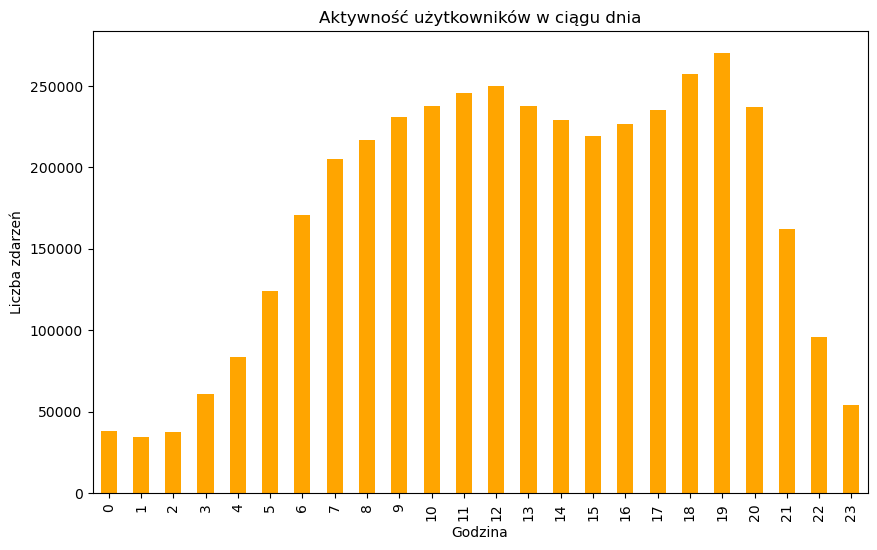

In [13]:
import matplotlib.pyplot as plt
df['hour'] = pd.to_datetime(df['event_time']).dt.hour
hourly_activity = df['hour'].value_counts().sort_index()
hourly_activity.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Aktywność użytkowników w ciągu dnia')
plt.xlabel('Godzina')
plt.ylabel('Liczba zdarzeń')
plt.show()


In [14]:
# Kwantyle dla R, F, M
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
print("Kwantyle dla RFM:")
print(quantiles)

# Funkcja do segmentacji
def rfm_segment(x, q, col):
    if x <= q[col][0.25]:
        return '1'
    elif x <= q[col][0.50]:
        return '2'
    elif x <= q[col][0.75]:
        return '3'
    else:
        return '4'

rfm['R_Segment'] = rfm['Recency'].apply(rfm_segment, args=(quantiles, 'Recency'))
rfm['F_Segment'] = rfm['Frequency'].apply(rfm_segment, args=(quantiles, 'Frequency'))
rfm['M_Segment'] = rfm['MonetaryValue'].apply(rfm_segment, args=(quantiles, 'MonetaryValue'))

# Łączenie segmentów w jeden kod
rfm['RFM_Segment'] = rfm['R_Segment'] + rfm['F_Segment'] + rfm['M_Segment']
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].astype(int).sum(axis=1)

print(rfm.head())


Kwantyle dla RFM:
      Recency  Frequency  MonetaryValue
0.25     26.0        1.0          13.81
0.50     66.0        2.0          54.76
0.75    106.0        4.0         134.92
          Recency  Frequency  MonetaryValue R_Segment F_Segment M_Segment  \
user_id                                                                     
15400971       78          3          28.56         3         3         2   
20554973       84          6          11.28         3         4         1   
23843972      146          2           3.96         4         2         1   
25635927      108          1           1.98         4         1         1   
30967218       66          5         503.96         2         4         4   

         RFM_Segment  RFM_Score  
user_id                          
15400971         332          8  
20554973         341          8  
23843972         421          7  
25635927         411          6  
30967218         244         10  


In [ ]:
print(rfm.dtypes)


Recency            int64
Frequency          int64
MonetaryValue    float64
R_Segment         object
F_Segment         object
M_Segment         object
RFM_Segment       object
RFM_Score          int64
dtype: object


In [ ]:
print(rfm['Recency'].unique())
print(rfm['Frequency'].unique())
print(rfm['MonetaryValue'].unique())


[18 24 86 48  6 89 25 28 33  9 78 81 36 46 52 76 41 63 83 82 13 21  2 90
 37 64 34 30 61 71 67 23  1  7 66 55 84 50 22 11  8 47 53 80 42 40 60 87
 75 79 32 20 59 19 27 85 43 44 49 29 56 17 39 58 74 88 26 70 12 68 16 38
  3  4 91 62 77 65 69  5 45 54 14 72 57 31  0 35 15 51 10 73]
[  3   6   2   1   5  18   4   7  11   9  10  31  46  15  28  13  17  19
  20  29  40  14  12   8  26  30  58  24  16  23  22  21  25  55  27  34
  48  38  45  41  43  33  59  32  64  63  83  56  51  52 333  35  61  36
 100  44  70  39  54  53  42  37 197  78  49  47  50  62  77  76  72  65
  93 104  97  66  57  80 125 110  90  60 181  71  79  68 102]
[ 28.56  11.28   3.96 ... 234.43 182.37 414.92]


In [ ]:
quantiles = rfm[['Recency', 'Frequency', 'MonetaryValue']].quantile(q=[0.25, 0.5, 0.75])
print("Kwantyle dla RFM:")
print(quantiles)


Kwantyle dla RFM:
      Recency  Frequency  MonetaryValue
0.25     24.0        1.0          13.86
0.50     42.0        2.0          54.76
0.75     66.0        4.0         142.38


In [ ]:
def rfm_segment(row, quantiles):
    r = '3' if row['Recency'] <= quantiles['Recency'][0.25] else ('2' if row['Recency'] <= quantiles['Recency'][0.75] else '1')
    f = '1' if row['Frequency'] <= quantiles['Frequency'][0.25] else ('2' if row['Frequency'] <= quantiles['Frequency'][0.75] else '3')
    m = '1' if row['MonetaryValue'] <= quantiles['MonetaryValue'][0.25] else ('2' if row['MonetaryValue'] <= quantiles['MonetaryValue'][0.75] else '3')
    return f"{r}{f}{m}"

rfm['RFM_Segment'] = rfm.apply(rfm_segment, axis=1, quantiles=quantiles)


rozkład segmentów

In [ ]:
print(rfm['RFM_Segment'].value_counts())


RFM_Segment
212    5779
211    3133
112    2958
222    2924
312    2621
233    2369
223    1997
221    1667
333    1655
322    1594
122    1528
311    1519
111    1517
232    1399
123    1039
323     946
133     897
121     870
321     837
332     813
213     618
132     515
113     487
231     307
131     142
331     131
313      56
Name: count, dtype: int64


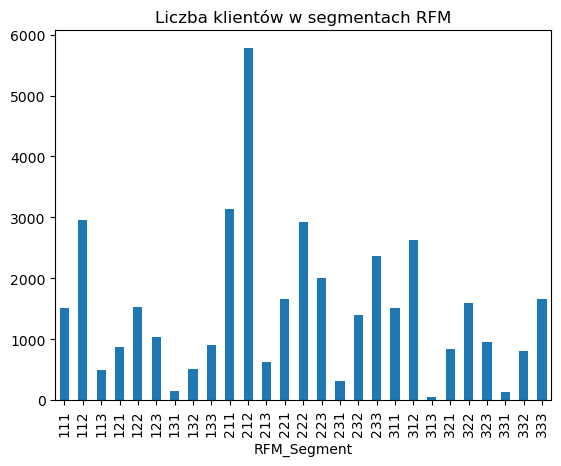

In [ ]:
import matplotlib.pyplot as plt
rfm['RFM_Segment'].value_counts().sort_index().plot(kind='bar')
plt.title("Liczba klientów w segmentach RFM")
plt.show()


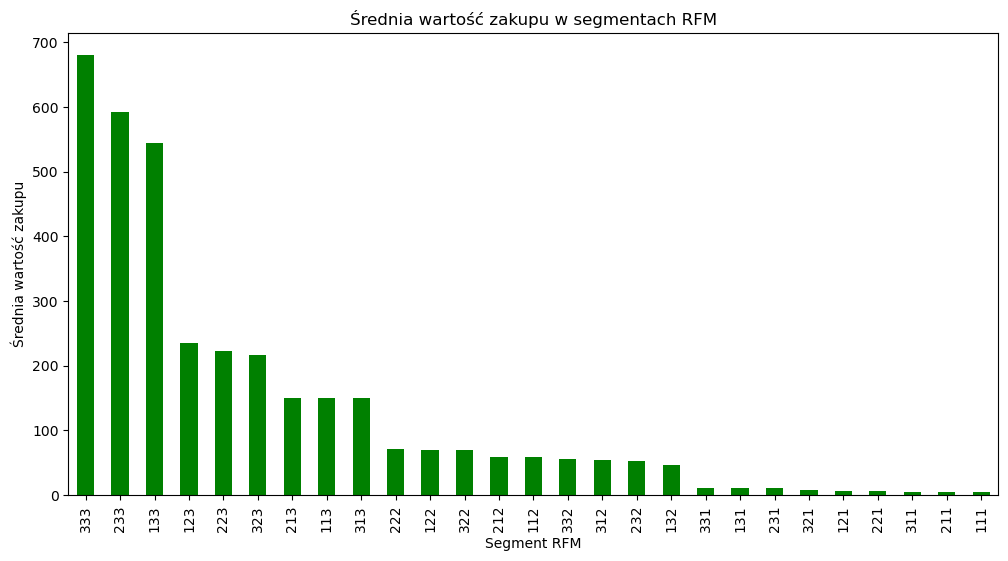

In [ ]:
rfm.groupby('RFM_Segment')['MonetaryValue'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Średnia wartość zakupu w segmentach RFM')
plt.xlabel('Segment RFM')
plt.ylabel('Średnia wartość zakupu')
plt.show()


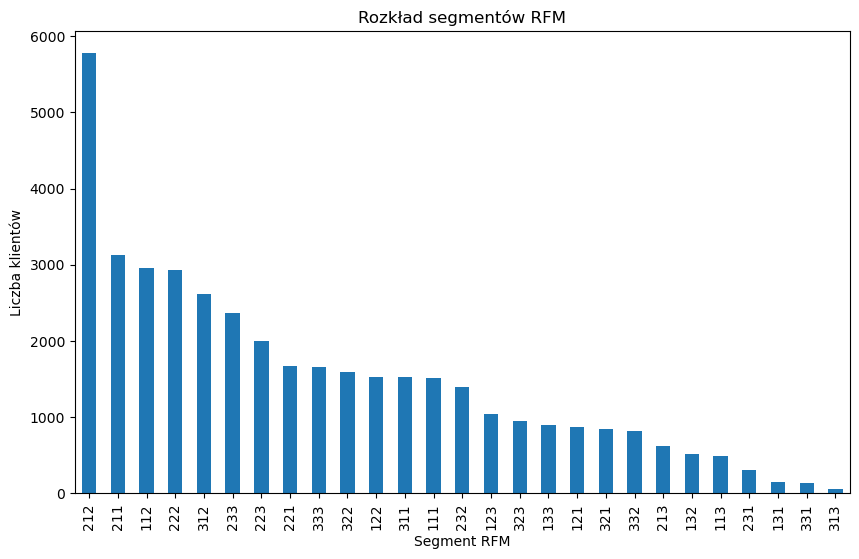

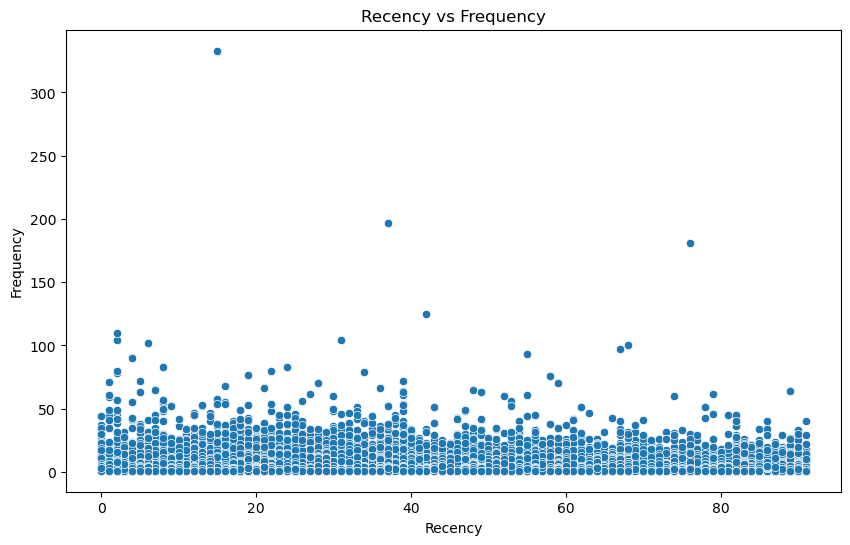

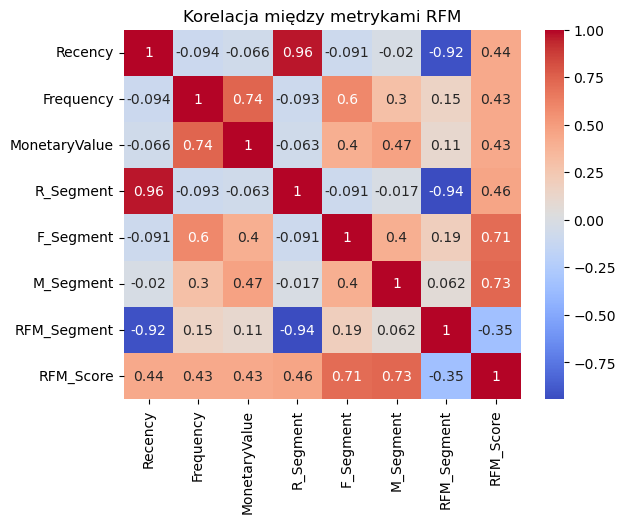

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram segmentów RFM
plt.figure(figsize=(10, 6))
rfm['RFM_Segment'].value_counts().plot(kind='bar')
plt.title('Rozkład segmentów RFM')
plt.xlabel('Segment RFM')
plt.ylabel('Liczba klientów')
plt.show()

# Wykres punktowy Recency vs Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', data=rfm)
plt.title('Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Wykres korelacji
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm')
plt.title('Korelacja między metrykami RFM')
plt.show()


In [ ]:
cart_abandonment = df[df['event_type'] == 'add_to_cart']['user_session'].nunique() - \
                   df[df['event_type'] == 'purchase']['user_session'].nunique()
print("Porzucone koszyki:", cart_abandonment)


Porzucone koszyki: -28894


In [ ]:
popular_products = df[df['event_type'] == 'view']['product_id'].value_counts().head(10)
print(popular_products)


product_id
5809910    24419
5909810     8473
5877454     6621
5809912     5944
5886282     5488
5877456     5022
5649236     4372
5809911     4307
5769877     4100
5856186     4015
Name: count, dtype: int64


In [ ]:
popular_products = df[df['event_type'] == 'view']['product_id'].value_counts().head(10)
print(popular_products)


product_id
5809910    24419
5909810     8473
5877454     6621
5809912     5944
5886282     5488
5877456     5022
5649236     4372
5809911     4307
5769877     4100
5856186     4015
Name: count, dtype: int64


In [ ]:
top_categories = df[df['event_type'] == 'view']['category_code'].value_counts().head(10)
print(top_categories)


category_code
appliances.environment.vacuum             20186
accessories.bag                            4538
furniture.living_room.cabinet              3761
apparel.glove                              3325
stationery.cartrige                        3283
furniture.bathroom.bath                    2155
appliances.personal.hair_cutter             923
accessories.cosmetic_bag                    481
appliances.environment.air_conditioner       74
furniture.living_room.chair                  20
Name: count, dtype: int64


In [ ]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,0
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,0
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,0
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,0
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,0
...,...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,23
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,23
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,23
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,23


## Analiza II podejście

./data/cosmetics/2019-Oct.csv wczytano poprawnie, rozmiar: 4102283 wierszy.
./data/cosmetics/2019-Nov.csv wczytano poprawnie, rozmiar: 4635837 wierszy.
./data/cosmetics/2019-Dec.csv wczytano poprawnie, rozmiar: 3533286 wierszy.
./data/cosmetics/2020-Jan.csv wczytano poprawnie, rozmiar: 4264752 wierszy.
./data/cosmetics/2020-Feb.csv wczytano poprawnie, rozmiar: 4156682 wierszy.
Łączny rozmiar danych: 20692840 wierszy, 9 kolumn.
event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object
Łączna liczba wierszy: 20692840
Unikalni użytkownicy: 1639358
Unikalne produkty: 54571
Unikalne sesje: 4535941


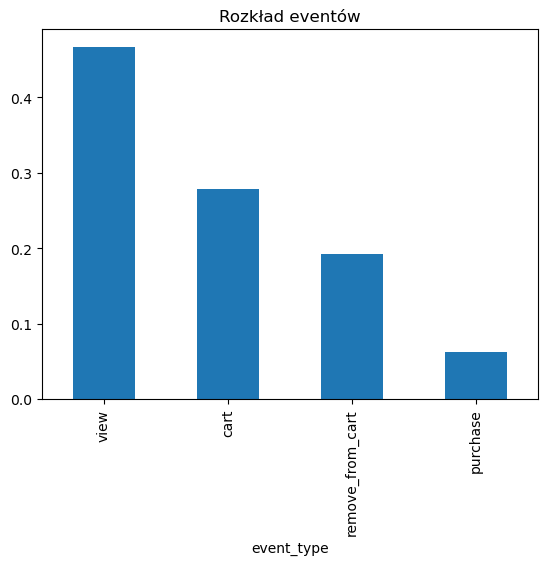

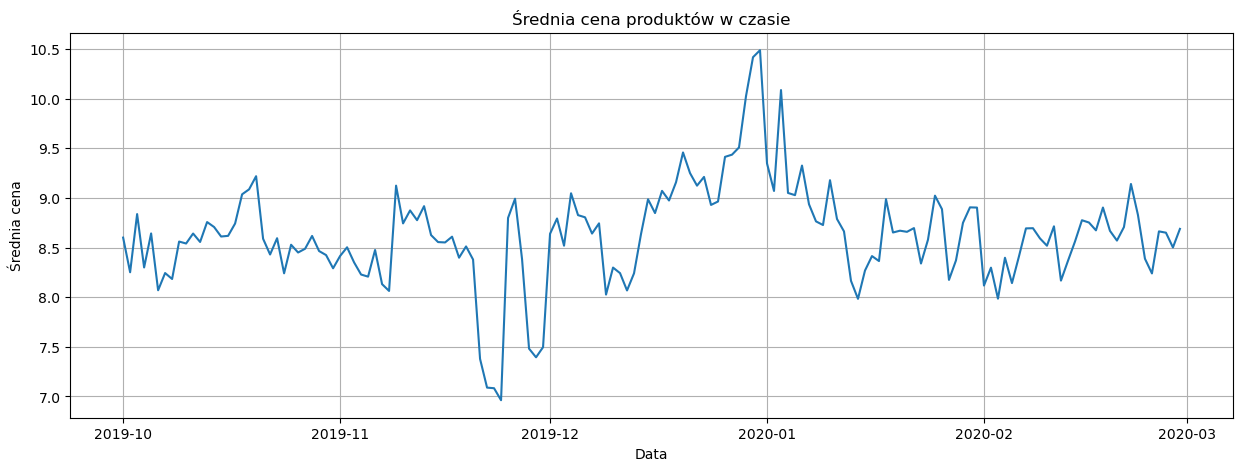

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytywanie danych eCommerce
file_paths = [
    './data/cosmetics/2019-Oct.csv',
    './data/cosmetics/2019-Nov.csv',
    './data/cosmetics/2019-Dec.csv',
    './data/cosmetics/2020-Jan.csv',
    './data/cosmetics/2020-Feb.csv'
]

# Łączenie wielu plików w jeden DataFrame
dataframes = []
for path in file_paths:
    try:
        df = pd.read_csv(path)
        dataframes.append(df)
        print(f"{path} wczytano poprawnie, rozmiar: {len(df)} wierszy.")
    except Exception as e:
        print(f"Nie udało się wczytać {path}: {e}")

data = pd.concat(dataframes, ignore_index=True)
print(f"Łączny rozmiar danych: {len(data)} wierszy, {data.shape[1]} kolumn.")

# Konwersja 'event_time' na datetime
data['event_time'] = pd.to_datetime(data['event_time'])
print(data.dtypes)  # Sprawdzenie typów danych

# Wyświetlenie podstawowych informacji o danych
print(f"Łączna liczba wierszy: {data.shape[0]}")
print(f"Unikalni użytkownicy: {data['user_id'].nunique()}")
print(f"Unikalne produkty: {data['product_id'].nunique()}")
print(f"Unikalne sesje: {data['user_session'].nunique()}")

# Przykładowe analizy
data['event_type'].value_counts(normalize=True).plot(kind='bar', title="Rozkład eventów")
plt.show()

# Grupa po dacie
data['date'] = data['event_time'].dt.date
daily_mean = data.groupby('date')['price'].mean()
plt.figure(figsize=(15, 5))
daily_mean.plot(title="Średnia cena produktów w czasie")
plt.xlabel("Data")
plt.ylabel("Średnia cena")
plt.grid()
plt.show()


In [ ]:
# Analiza unikalnych wartości
print('# of datapoints: ' + str(data.shape))
print('# of unique users: ' + str(data['user_id'].drop_duplicates().shape[0]))
print('# of unique products: ' + str(data['product_id'].drop_duplicates().shape[0]))
print('# of unique sessions: ' + str(data['user_session'].drop_duplicates().shape[0]))


# of datapoints: (20692840, 10)
# of unique users: 1639358
# of unique products: 54571
# of unique sessions: 4535942


In [ ]:
import matplotlib.pyplot as plt

def plot_sparse(df, col):
    stats = df[col].value_counts()
    plt.figure(figsize=(15, 4))
    plt.bar(stats.index[:20].astype(str), stats.values[:20])
    plt.title(f"Częstotliwość wartości w kolumnie: {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Liczba wystąpień")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
def plot_top20(df, col):
    stats = df[col].value_counts()
    stats = stats.head(20)
    plt.figure(figsize=(15, 4))
    plt.bar(stats.index.astype(str), stats.values)
    plt.title(f"Top 20 najczęstszych wartości w kolumnie: {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Liczba wystąpień")
    plt.xticks(rotation=45)
    plt.show()


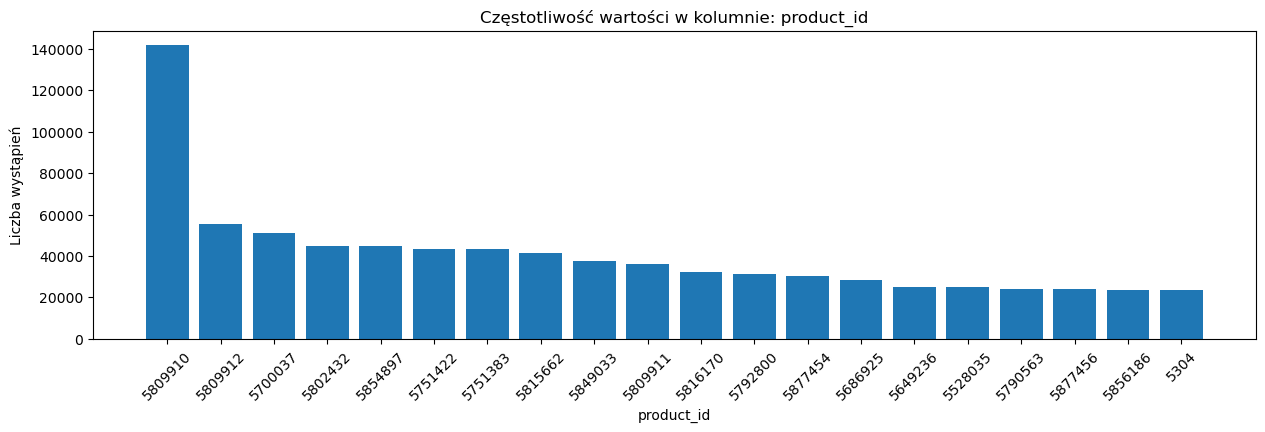

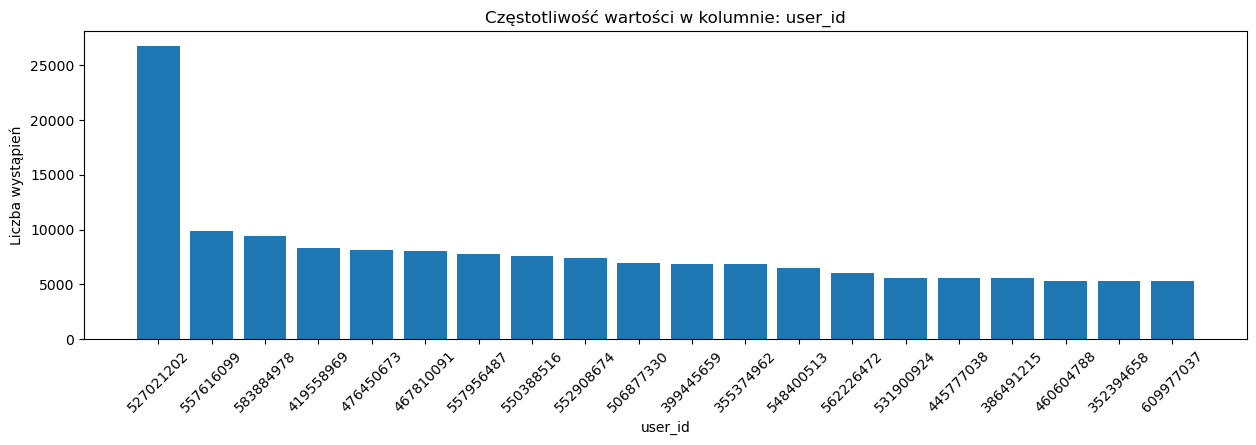

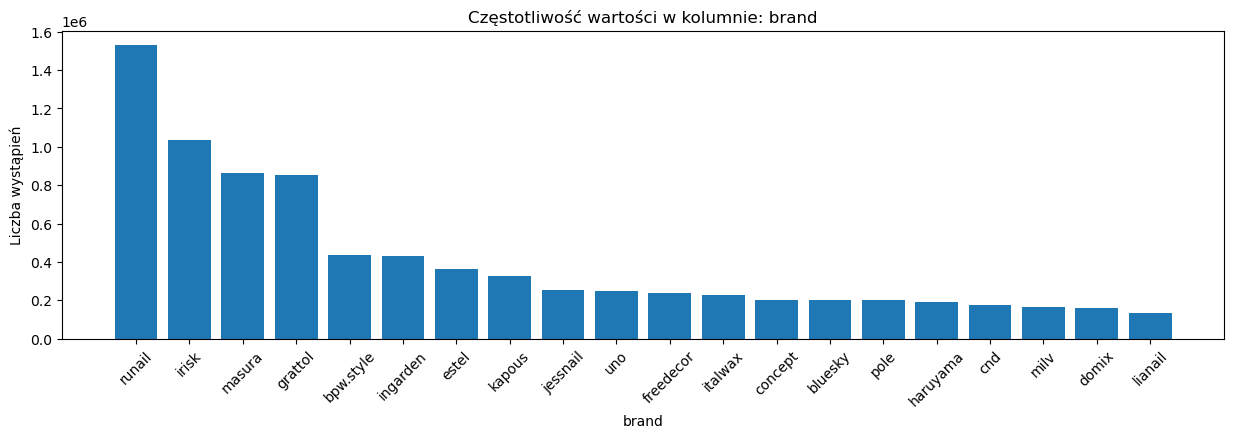

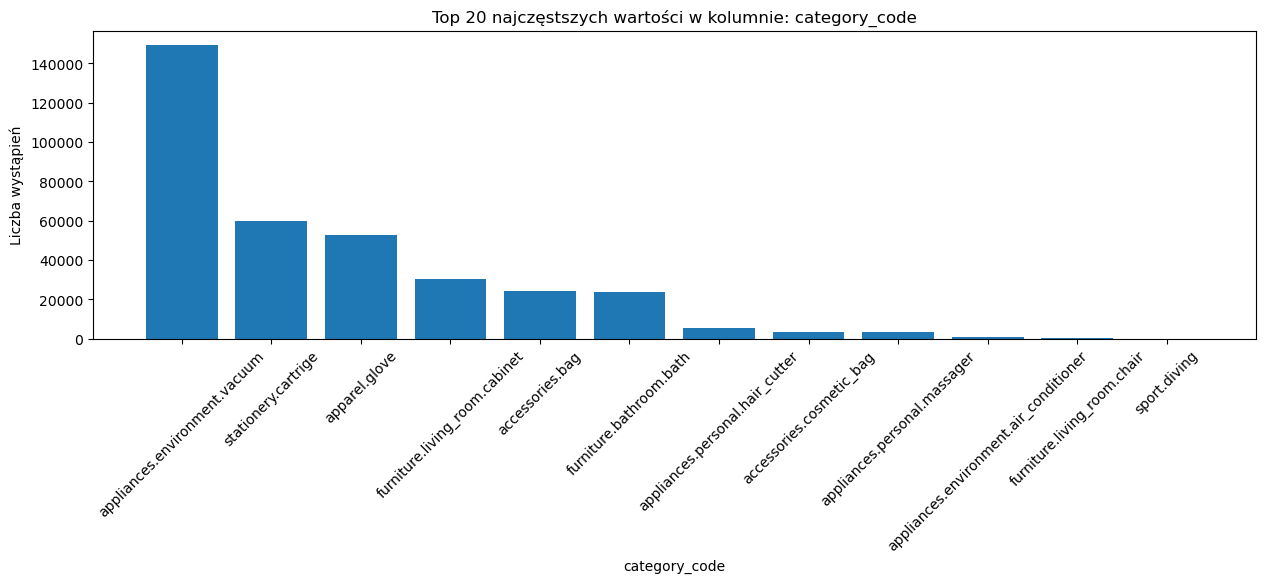

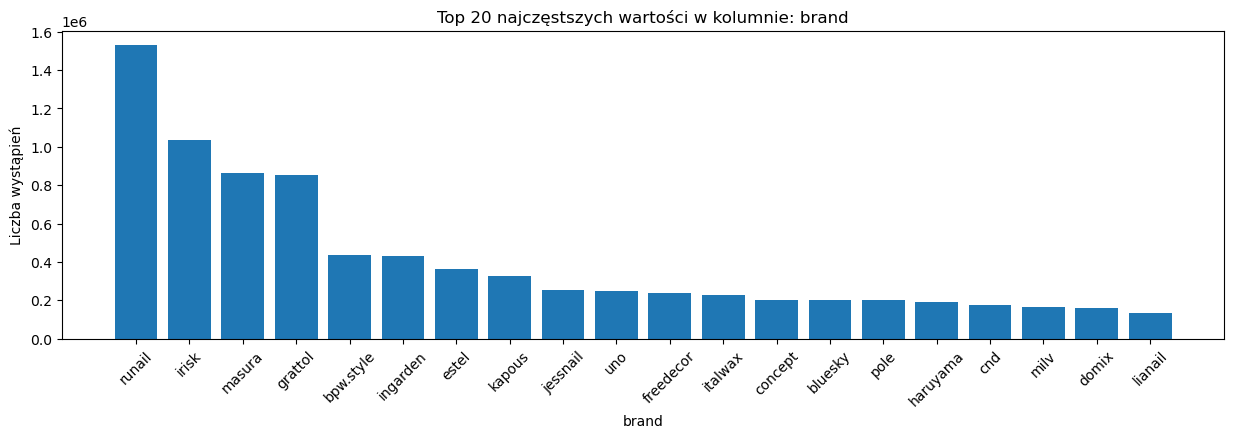

In [ ]:
# Wykres częstotliwości
plot_sparse(data, 'product_id')
plot_sparse(data, 'user_id')
plot_sparse(data, 'brand')

# Wykres Top 20 wartości
plot_top20(data, 'category_code')
plot_top20(data, 'brand')


Kluczowe wnioski, np.:
- Produkty/kategorie generujące największe przychody.
- Czas największej aktywności użytkowników.
- Sklepy o największym potencjale wzrostu.
- Obszary wymagające poprawy (np. wysoki wskaźnik porzuceń koszyków).
